In [ ]:
# Test run of the CpG Net API.
# Author: Jack Duryea

In [147]:
from CpG_Net import CpGNet
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# Automatic reloading so we don't have to restart the kernel each time we make a change
# to CpGNet when we are debuggin
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step 1: Collect some data

In [10]:

# Some bins with 2 cpgs
bin1 = np.array([[1,0],[0,-1],[-1,1],[0,0]],dtype=float)
bin2 = np.array([[1,0],[1,0],[-1,1],[0,0],[0,1],[1,1],[0,0]],dtype=float)
bin3 = np.array([[-1,1],[0,-1],[-1,1],[0,0]],dtype=float)
bin4 = np.array([[1,-1],[0,1],[-1,1],[1,0]],dtype=float)
bin5 = np.array([[1,1],[0,0],[0,1],[1,1]],dtype=float)
bin6 = np.array([[1,1],[1,1],[0,1],[1,0]],dtype=float)
bin7 = np.array([[0,0],[1,0],[0,1],[1,1]],dtype=float)

# Collection of bins
bins = [bin1,bin2,bin3,bin4, bin5, bin6, bin7]

### Step 2: Create a model and train on the data. CpGNet will take care of  feature extraction and all that other boring stuff, it just works!

In [11]:
net = CpGNet(cpgDensity=2)
net.train(bins)

100%|██████████| 3/3 [00:00<00:00, 340.18it/s]


encoded vector: [ 0.  0.  1.  1.  0.  0.  0.  1.  1.]
encoded vector normalized [[ 0.    0.    0.25  0.25  0.    0.    0.    0.25  0.25]]
encoded vector: [ 0.  0.  1.  0.  0.  0.  1.  1.  1.]
encoded vector normalized [[ 0.    0.    0.25  0.    0.    0.    0.25  0.25  0.25]]
encoded vector: [ 0.  0.  1.  1.  0.  0.  0.  0.  2.]
encoded vector normalized [[ 0.    0.    0.25  0.25  0.    0.    0.    0.    0.5 ]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              16000     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 800)               800800    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 800)               0  

### Step 3: Impute!

In [12]:
net.impute(bin1)

encoded vector: [ 0.  0.  1.  1.  1.  0.  0.  1.  0.]
encoded vector normalized [[ 0.    0.    0.25  0.25  0.25  0.    0.    0.25  0.  ]]


array([[ 1.        ,  0.        ],
       [ 0.        ,  0.51451188],
       [ 0.50505114,  1.        ],
       [ 0.        ,  0.        ]])

In [54]:
net.impute(bin3)

array([[ 0.50446618,  1.        ],
       [ 0.        ,  0.5174641 ],
       [ 0.50906342,  1.        ],
       [ 0.        ,  0.        ]])

In [13]:
binA = np.array([[0,0],[0,0],[0,-1],[0,0],[0,0]],dtype=float)

In [14]:
binB = np.array([[1,1],[1,1],[1,-1],[1,1],[1,1]],dtype=float)

In [15]:
net.impute(binB)

encoded vector: [ 0.  0.  0.  0.  0.  0.  1.  0.  4.]
encoded vector normalized [[ 0.   0.   0.   0.   0.   0.   0.2  0.   0.8]]


array([[ 1.        ,  1.        ],
       [ 1.        ,  1.        ],
       [ 1.        ,  0.51642925],
       [ 1.        ,  1.        ],
       [ 1.        ,  1.        ]])

In [48]:
predicted_matrices = net.impute_many(bins)

In [53]:
predicted_matrices[2]

array([[ 0.50446618,  1.        ],
       [ 0.        ,  0.5174641 ],
       [ 0.50906342,  1.        ],
       [ 0.        ,  0.        ]])

# Is batch imputation faster?

In [150]:
test_bins_100 = bins[:4] * 25
test_bins_1000 = bins[:4] * 250

In [151]:
len(test_bins_100)

100

In [152]:

individual_data = []

for i in tqdm(range(20)):
    start = time.time()

    for bin_ in test_bins_1000:
        net.impute(bin_)
        
    end = time.time()
    duration = end-start
    individual_data.append(duration)



100%|██████████| 20/20 [00:33<00:00,  1.89s/it]


In [154]:

batch_data = []
for i in tqdm(range(20)):
    start = time.time()

    net.impute_many(test_bins_1000)
        
    end = time.time()
    end = time.time()
    duration = end-start
    batch_data.append(duration)


100%|██████████| 20/20 [00:07<00:00,  2.61it/s]


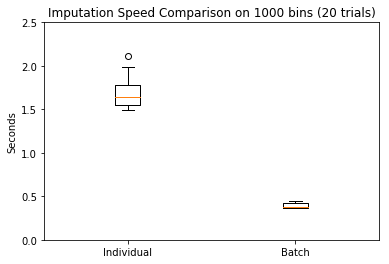

In [161]:
plt.boxplot([individual_data,batch_data]);
plt.xticks([1,2],["Individual","Batch"])
plt.ylim([0,2.5])
plt.ylabel("Seconds")
plt.title("Imputation Speed Comparison on 1000 bins (20 trials)")
plt.savefig("batch_speed.png",dpi=500)

In [158]:
np.mean(individual_data)

1.6867809891700745

In [159]:
np.mean(batch_data)

0.39413212537765502

In [160]:
np.mean(individual_data)/np.mean(batch_data)

4.2797348415935677